# Reading Covid 19 X-ray meta data file 

In [6]:
import pandas as pd 

covid_md = pd.read_csv('archive\COVID-19_Radiography_Dataset\COVID.metadata.csv')
normal_md = pd.read_csv('archive\COVID-19_Radiography_Dataset\\Normal.metadata.csv')
# covid_md = pd.read_csv('COVID.metadata.xlsx.csv')
# covid_md.head()

FileNotFoundError: [Errno 2] No such file or directory: 'archive\\COVID-19_Radiography_Dataset\\COVID.metadata.csv'

In [ ]:
# checking if all the images are of all the same format 
covid_md['FILE NAME'][0]

# loading covid images

In [7]:
print('Data shape ', covid_md.shape)
# adding label colum label (of one's)
covid_md['LABEL'] = 1

NameError: name 'covid_md' is not defined

In [52]:
import glob
import cv2
import matplotlib.pyplot as plt

covid_image = []
images = glob.glob('archive\COVID-19_Radiography_Dataset\COVID\\images\*.png')
# images =  glob.glob('img.jpg')
images[:4]
# for im in images:
#     img = cv2.imread(im,0)
#     imgs = cv2.resize(img, (128,128))
#     covid_image.append(imgs)

# print(covid_image[0].shape)


['archive\\COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1.png',
 'archive\\COVID-19_Radiography_Dataset\\COVID\\images\\COVID-10.png',
 'archive\\COVID-19_Radiography_Dataset\\COVID\\images\\COVID-100.png',
 'archive\\COVID-19_Radiography_Dataset\\COVID\\images\\COVID-1000.png']

In [5]:
# adding image columns to database 
covid_md['IMAGE'] = [image for image in covid_image]

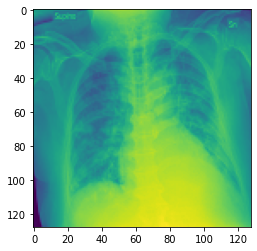

In [6]:
plt.imshow(covid_md['IMAGE'][1])

# loading normal images

In [7]:
import glob
import cv2
import matplotlib.pyplot as plt


normal_image = []
images2 = glob.glob('archive\COVID-19_Radiography_Dataset\\Normal\images\*.png')
# images =  glob.glob('img.jpg')

for im in images2:
    img = cv2.imread(im,0)
    imgs=cv2.resize(img, (128,128))
    normal_image.append(imgs)

print(normal_image[0].shape)

(128, 128)


In [8]:
print('Data shape ', normal_md.shape)
# adding label colum label (of one's) 
normal_md['LABEL'] = 0
normal_md.head(2)

Data shape  (10192, 4)


,FILE NAME,FORMAT,SIZE,URL,LABEL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,0
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,0


# Appending image to dataframe

In [9]:
normal_md['IMAGE'] = [image for image in normal_image]

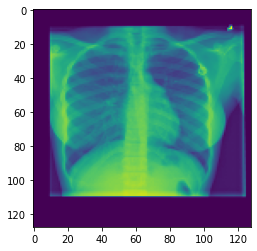

In [10]:
plt.imshow( normal_md['IMAGE'][0] )

In [11]:
normal_md.head(2)

,FILE NAME,FORMAT,SIZE,URL,LABEL,IMAGE
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,0,"[[9, 9, 9, 9, 9, 8, 8, 8, 8, 7, 7, 6, 5, 5, 4,..."


In [12]:
# normal_md.head(3)
normal_md['IMAGE'][0].shape

(128, 128)

In [13]:
images = normal_md['IMAGE']
# plt.imshow(images[0])
images[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

#  MERGING DATAFRAM (COVID AND NORMAL)

In [14]:
import numpy as np
# X=[]
# y=[]

# def load_image(image):
#     X.append([m for m in image])

# load_image(covid_image)
# load_image(normal_image)

# # plt.imshow(X[0][400])
# X = np.array(X,dtype=object)
# print(len(X.reshape()))
# len(X[0])

In [15]:
data = pd.concat([covid_md,normal_md] , axis=0, ignore_index=True)
data.head()

,FILE NAME,FORMAT,SIZE,URL,LABEL,IMAGE
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,1,"[[52, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,1,"[[132, 128, 128, 126, 126, 125, 123, 122, 121,..."
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,1,"[[19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,1,"[[71, 71, 71, 71, 71, 71, 71, 69, 63, 60, 55, ..."
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [16]:
dataset = data[['IMAGE', 'FILE NAME', 'LABEL']]
dataset.sample(10)

,IMAGE,FILE NAME,LABEL
5797,"[[188, 149, 119, 101, 99, 98, 98, 98, 96, 96, ...",NORMAL-2182,0
13337,"[[182, 113, 42, 19, 9, 9, 10, 10, 10, 10, 10, ...",NORMAL-9722,0
13174,"[[245, 236, 227, 221, 215, 211, 210, 210, 209,...",NORMAL-9559,0
9681,"[[26, 5, 5, 4, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6...",NORMAL-6066,0
5533,"[[205, 196, 167, 72, 8, 0, 0, 3, 9, 13, 14, 15...",NORMAL-1918,0
6218,"[[14, 13, 11, 9, 9, 9, 7, 8, 13, 18, 21, 24, 2...",NORMAL-2603,0
5359,"[[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",NORMAL-1744,0
10040,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",NORMAL-6425,0
8173,"[[44, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1...",NORMAL-4558,0
11485,"[[196, 148, 122, 101, 95, 95, 96, 96, 96, 97, ...",NORMAL-7870,0


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13808 entries, 0 to 13807
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IMAGE      13808 non-null  object
 1   FILE NAME  13808 non-null  object
 2   LABEL      13808 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 323.8+ KB


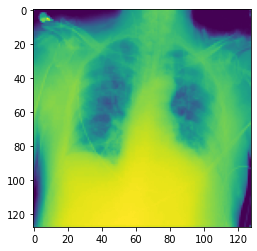

In [18]:
sample = dataset['IMAGE'][:5]
plt.imshow(sample[0])

In [19]:
# changing the dimension of all image to 256,256

# def change_dimension(image, dimension):
#     image=[cv2.resize(img, dimension , interpolation = cv2.INTER_AREA) for img in image] 
#     return image

# dim = (256,256)
# dataset['IMAGE'] = dataset['IMAGE'].apply(lambda x: change_dimension(x, dim))

In [20]:
from sklearn import model_selection

In [21]:
x = dataset['IMAGE'].to_list()
y = dataset['LABEL']

train_x, test_x, train_y, test_y = model_selection.train_test_split(x, y, test_size=0.2)

In [22]:

train_x = np.asarray(train_x).astype(np.int)
train_x.shape

C:\Users\binary\AppData\Local\Temp\ipykernel_9052\2517289198.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_x = np.asarray(train_x).astype(np.int)


(11046, 128, 128)

In [23]:
# train_y = np.asarray(train_y).astype(np.int)
print(len(train_y))
print(train_y.ndim)
# flat_trainx = train_x.reshape(len(train_x), 128*128)

11046
1


# ANN network

In [24]:
import tensorflow as tf
from tensorflow import keras

In [1]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(128,128)),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

NameError: name 'keras' is not defined

In [26]:
model.fit(train_x, train_y, epochs=5)

Epoch 1/5
346/346 [==============================] - 39s 107ms/step - loss: 171.3980 - accuracy: 0.7062
Epoch 2/5
346/346 [==============================] - 40s 115ms/step - loss: 38.1932 - accuracy: 0.7396
Epoch 3/5
346/346 [==============================] - 42s 123ms/step - loss: 20.1763 - accuracy: 0.7655
Epoch 4/5
346/346 [==============================] - 43s 124ms/step - loss: 6.8800 - accuracy: 0.7835
Epoch 5/5
346/346 [==============================] - 44s 127ms/step - loss: 5.2829 - accuracy: 0.7823


# scalling to improve accuracy 

# CNN Network

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
cnn_model = keras.Sequential([
    
    #  cnn layer  and pooling layer............ 1
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(128,128,1)),
    keras.layers.MaxPooling2D((2,2)),
    

    #   cnn layer  and pooling layer............ 2
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    
    #   dense layer.............
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 64)                3

In [5]:
cnn_model.fit(train_x, train_y, epochs=5)

NameError: name 'train_x' is not defined

In [ ]:
print(len('test', test_x))
print(len('test y', test_y))
# cnn_model.evaluate(test_x, test_y)